In [31]:
from mlp import train, predict, Dense, Activation, predict_with_layer_value
from activation_functions import Tanh
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix
from data.font import fontDict
from main import visualize_results, plot_latent_space
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

In [33]:
autoencoder = [
    Dense(35, 20, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(20, 10, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(10, 2, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(2, 10, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(10, 20, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
    Dense(20, 35, optimizer_type="ADAM", learning_rate=0.01),
    Tanh(),
]
train(autoencoder, mse, mse_derivative, X, X, epochs=1000, verbose=False)


latent_space = [predict_with_layer_value(autoencoder, x, 5) for x in X]

In [59]:
def plot_bitmap_matrix(original, predicted, character):
    # Crear un heatmap con imshow de matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(3, 2)) # 1 fila, 2 columnas

    # Crear heatmaps para cada par de matrices
    axs[0].imshow(original, cmap='binary', interpolation='none')
    axs[0].set_title('Original ' + character)
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    axs[1].imshow(predicted, cmap='binary', interpolation='none')
    axs[1].set_title('Predicted ' + character)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    

    # Ajustar el diseño del gráfico
    plt.tight_layout()

    # Mostrar el gráfico con ambos pares de matrices
    plt.show()

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']


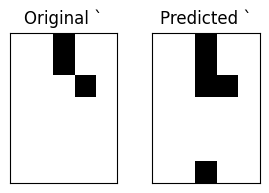

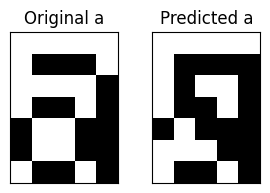

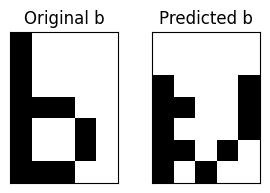

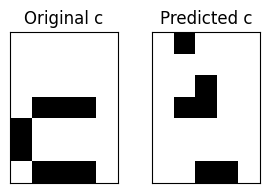

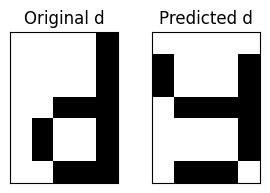

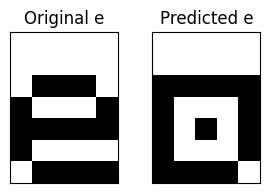

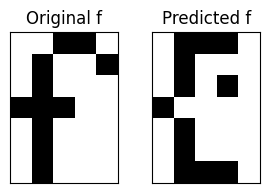

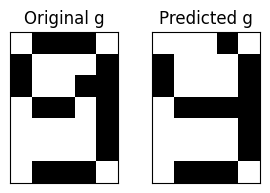

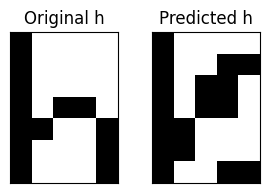

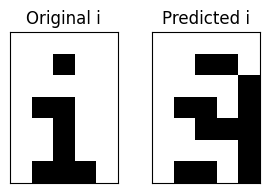

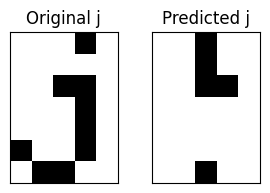

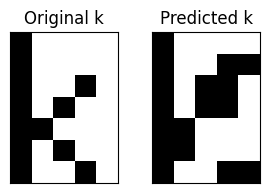

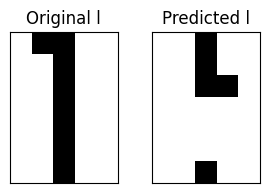

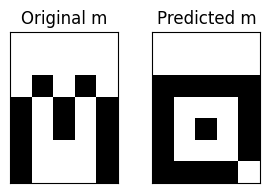

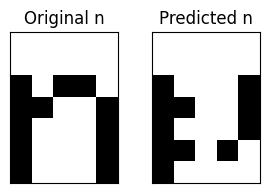

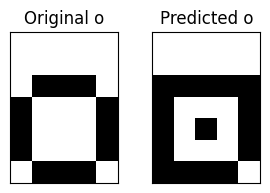

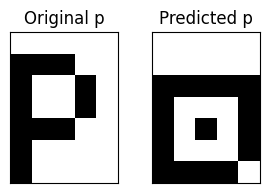

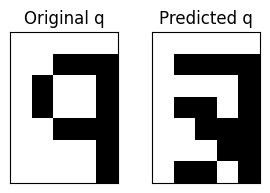

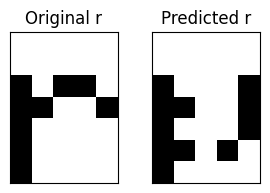

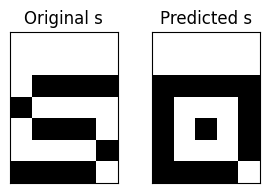

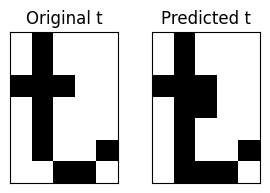

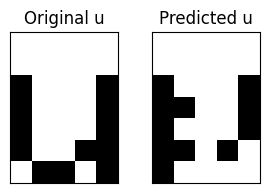

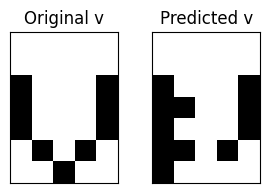

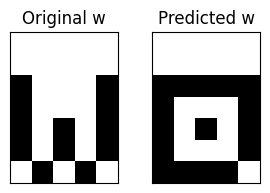

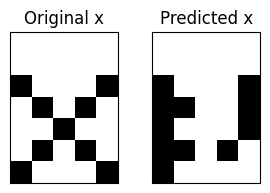

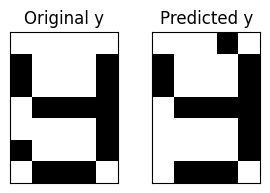

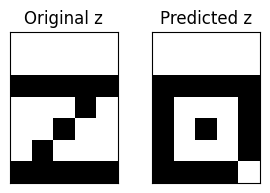

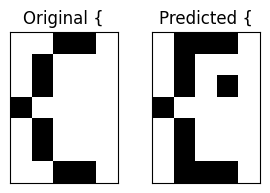

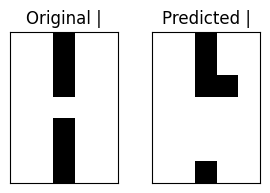

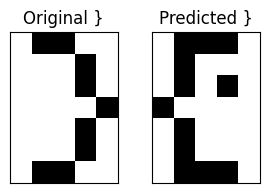

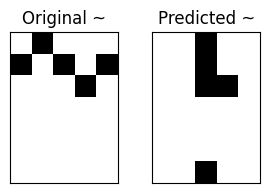

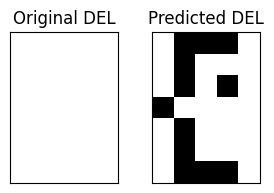

In [60]:
characters = list(bitmapDict.keys())
print(characters)

for c in range(len(characters)):
    input_bitmap = []
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    output_bitmap = ([round(abs(num[0])) for num in predict(autoencoder, X[c])])
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    
    plot_bitmap_matrix(input_bitmap_matrix, output_bitmap_matrix, characters[c])

In [61]:
#visualize_results(X, latent_space, num_samples=7)


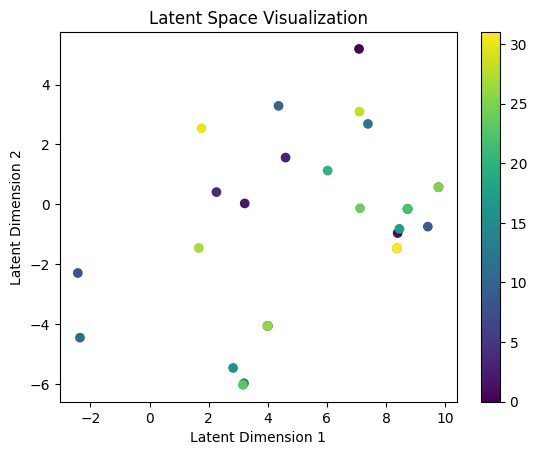

In [37]:
plot_latent_space(latent_space, labels=np.arange(len(X)))